In [15]:
# this dataset contains the information about users of a social media network. We are trying to find out which of these users are going to buy an SUV 
# from ads posted on the social media network. We will estimate this using the age and salary of the user using Logistic Regression

# by nandita sajeev

# importing the dataset 
import pandas as pd
import numpy as mp
import matplotlib.pyplot as plt

dataset = pd.read_csv("Social_media_ads.csv")
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [20]:
# defining the dependent and independent variables
x = dataset.iloc[:, 2:4].values
y = dataset.iloc[:, 4].values

In [21]:
# splitting the dataset into train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [22]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [23]:
# applying the logistic regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression()

In [24]:
# predicting the test results
y_pred = classifier.predict(x_test)

In [28]:
# visualising the results using a confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy:",accuracy_score(y_test, y_pred))

[[57  1]
 [ 5 17]]
Accuracy: 0.925


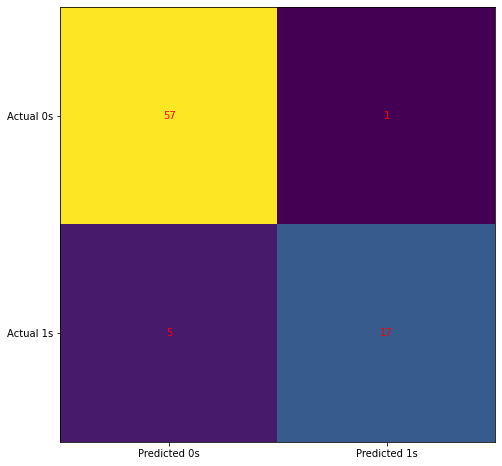

In [29]:
#visualising the confusion mat

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()